In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


## DataSet

In [3]:
# read csv files
aisles=pd.read_csv("aisles.csv")
departments=pd.read_csv("departments.csv")
order_products_prior=pd.read_csv("order_products__prior.csv")
order_products__train=pd.read_csv("order_products__train.csv")
orders=pd.read_csv("orders.csv")
products=pd.read_csv("products.csv")

In [4]:
aisles.head(2)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses


In [5]:
departments.head(2)

,department_id,department
0,1,frozen
1,2,other


In [6]:
order_products_prior.head(2)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1


In [7]:
order_products__train.head(2)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1


In [8]:
orders.head(2)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


In [9]:
products.head(2)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13


## Count of rows in each of the three sets

In [22]:
# count eval_set in the order dataset

def get_unique_count(x):
    return len(np.unique(x))

count_evalSet = orders.groupby("eval_set")["user_id"].aggregate(get_unique_count)
count_evalSet

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

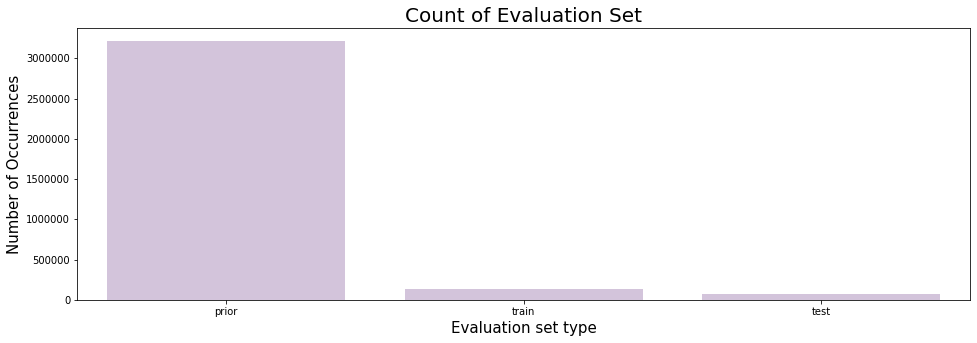

In [77]:
# count eval_set in the order dataset
count_evalSet = orders.eval_set.value_counts()
plt.figure(figsize=(16,5))
sns.barplot(count_evalSet.index, count_evalSet.values, alpha=0.8, color=color[8])
plt.ylabel('Number of Occurrences', fontsize=15)
plt.xlabel('Evaluation set type', fontsize=15)
plt.title('Count of Evaluation Set', fontsize=20)
plt.xticks(rotation='horizontal')
plt.savefig("Count of Evaluation Set")
plt.show()

## Validate the claim of the customers' orders

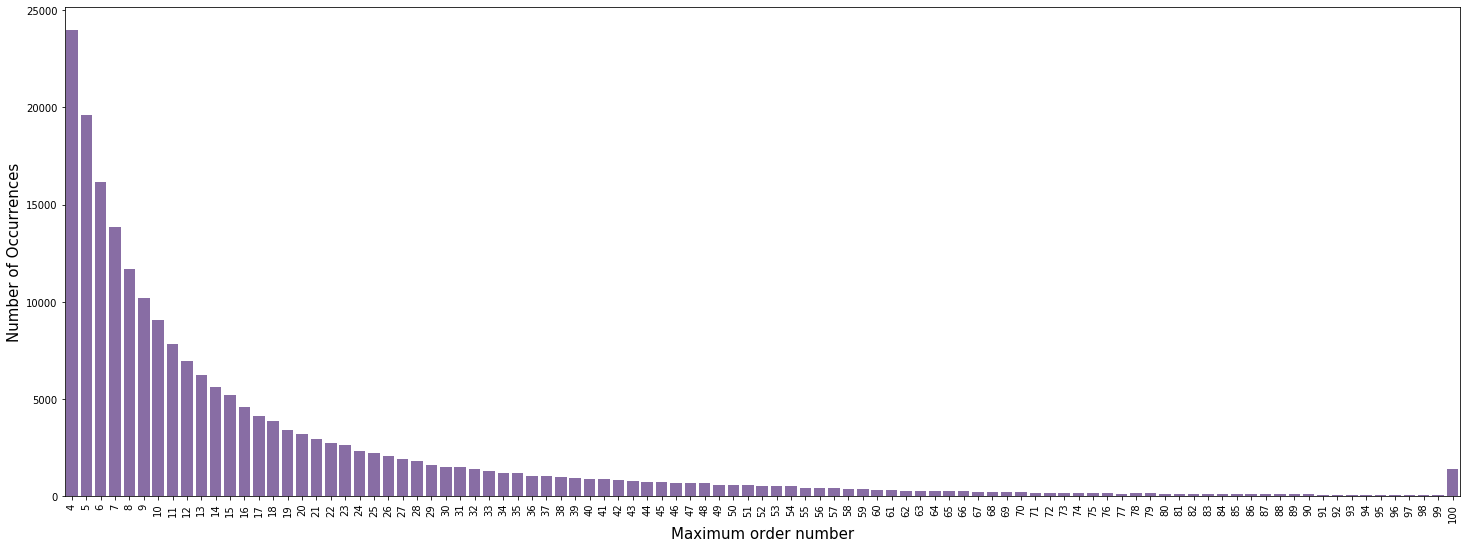

In [80]:
# Number of Occurrence of the orders

count_occurance = orders.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
count_occurance = count_occurance.order_number.value_counts()
plt.figure(figsize=(25,9))
sns.barplot(count_occurance.index, count_occurance.values, alpha=0.8, color=color[9])
plt.ylabel('Number of Occurrences', fontsize=15)
plt.xlabel('Maximum order number', fontsize=15)
plt.xticks(rotation='vertical')
plt.savefig("Validate the clain of the customer orders")
plt.show()

## Ordering habit by day of week

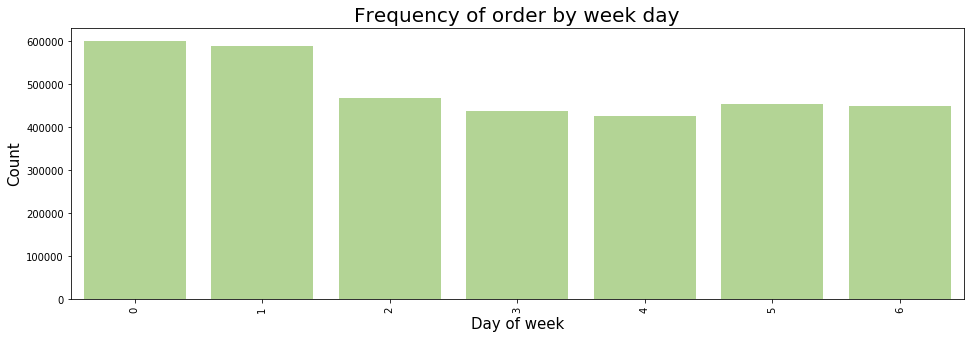

In [83]:
# Frequency of the Week

plt.figure(figsize=(16,5))
sns.countplot(x="order_dow", data=orders, color=color[2])
plt.ylabel('Count', fontsize=15)
plt.xlabel('Day of week', fontsize=15)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=20)
plt.savefig("Frequency of the week")
plt.show()

## Frequency of order by hour of day

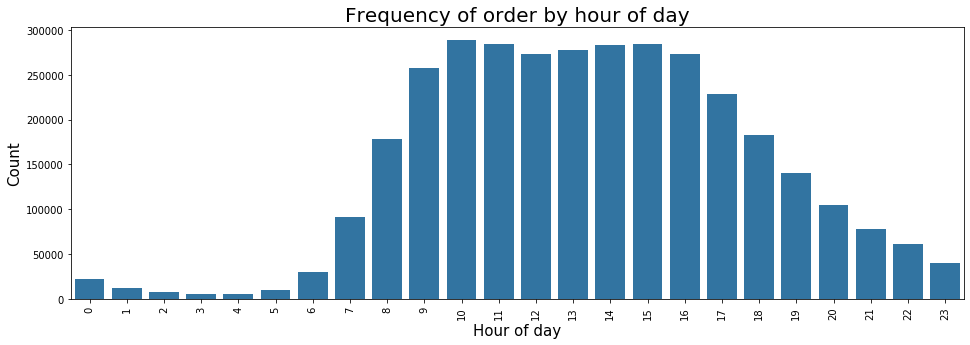

In [86]:
# Frequency of Order by Hour of Day

plt.figure(figsize=(16,5))
sns.countplot(x="order_hour_of_day", data=orders, color=color[1])
plt.ylabel('Count', fontsize=15)
plt.xlabel('Hour of day', fontsize=15)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=20)
plt.savefig("Frequency of the order by hour of day")
plt.show()

## Frequency of Day of Week vs Hour of Day

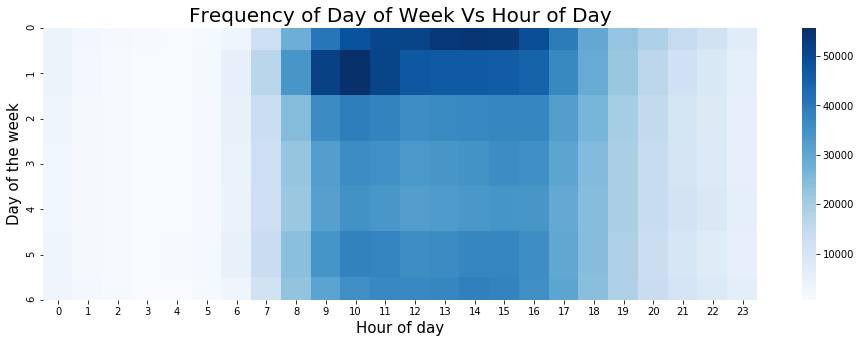

In [90]:
# Frequency of Day of Week vs Hour of Day

grouped_df = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(16,5))
sns.heatmap(grouped_df, cmap="Blues")
plt.ylabel('Day of the week', fontsize=15)
plt.xlabel('Hour of day', fontsize=15)
plt.title("Frequency of Day of Week Vs Hour of Day", fontsize=20)
plt.savefig("Frequency of Day of Week Vs Hour of Day")

plt.show()

## Frequency Distribution by Day since Prior Order

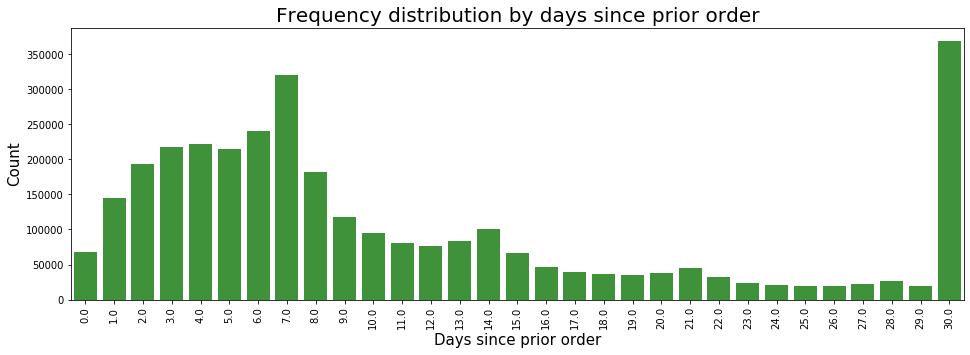

In [93]:
plt.figure(figsize=(16,5))
sns.countplot(x="days_since_prior_order", data=orders, color=color[3])
plt.ylabel('Count', fontsize=15)
plt.xlabel('Days since prior order', fontsize=15)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=20)
plt.savefig("Frequency distribution by days since prior order")
plt.show()

In [26]:
# Percentage of re-orders in prior set #
order_products_prior.reordered.sum() / order_products_prior.shape[0]

0.5896974667922161

In [27]:
# Percentage of re-orders in train set #
order_products__train.reordered.sum() / order_products__train.shape[0]

0.5985944127509629

In [28]:
grouped_df = order_products_prior.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df["reordered"].ix[grouped_df["reordered"]>1] = 1
grouped_df.reordered.value_counts() / grouped_df.shape[0]

/Users/cindyw/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


1    0.879151
0    0.120849
Name: reordered, dtype: float64

In [29]:
grouped_df = order_products__train.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df["reordered"].ix[grouped_df["reordered"]>1] = 1
grouped_df.reordered.value_counts() / grouped_df.shape[0]

/Users/cindyw/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


1    0.93444
0    0.06556
Name: reordered, dtype: float64

## The number of products bought in each order

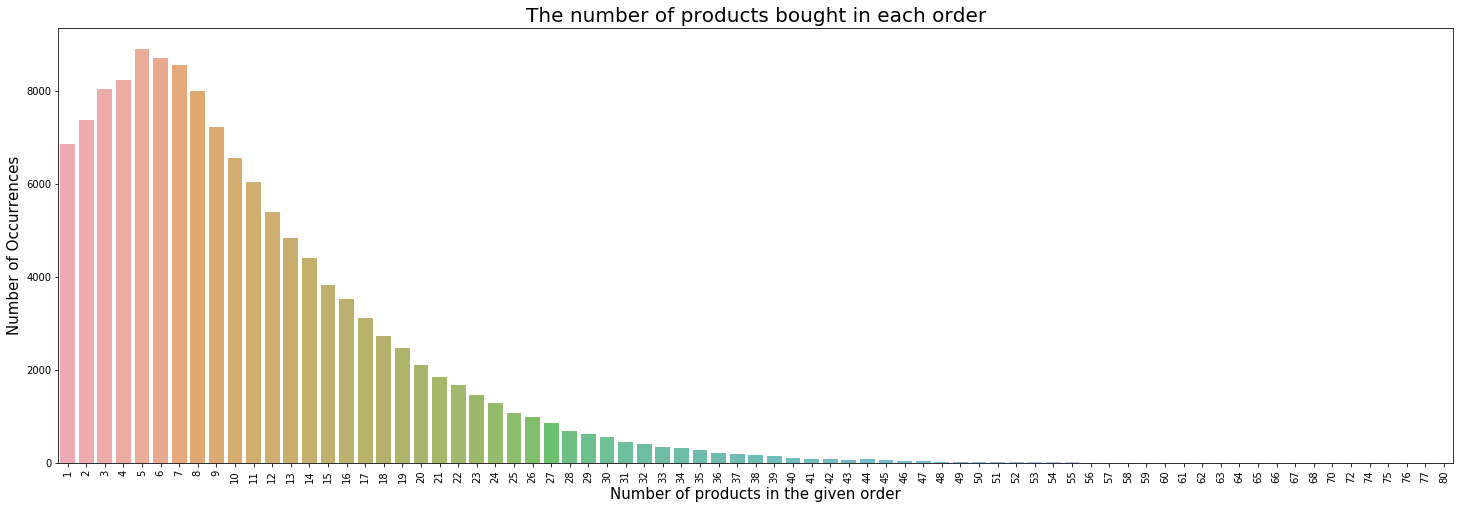

In [94]:
grouped_df = order_products__train.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
cnt_srs = grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(25,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=15)
plt.xlabel('Number of products in the given order', fontsize=15)
plt.xticks(rotation='vertical')
plt.title("The number of products bought in each order", fontsize=20)
plt.savefig("The number of products bought in each order")
plt.show()

In [31]:
order_products_prior = pd.merge(order_products_prior, products, on='product_id', how='left')
order_products_prior = pd.merge(order_products_prior, aisles, on='aisle_id', how ='left')
order_products_prior = pd.merge(order_products_prior, departments, on='department_id', how='left')
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [62]:
cnt_srs = order_products_prior['product_name'].value_counts().reset_index().head(15)
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs

,product_name,frequency_count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


## Aisle

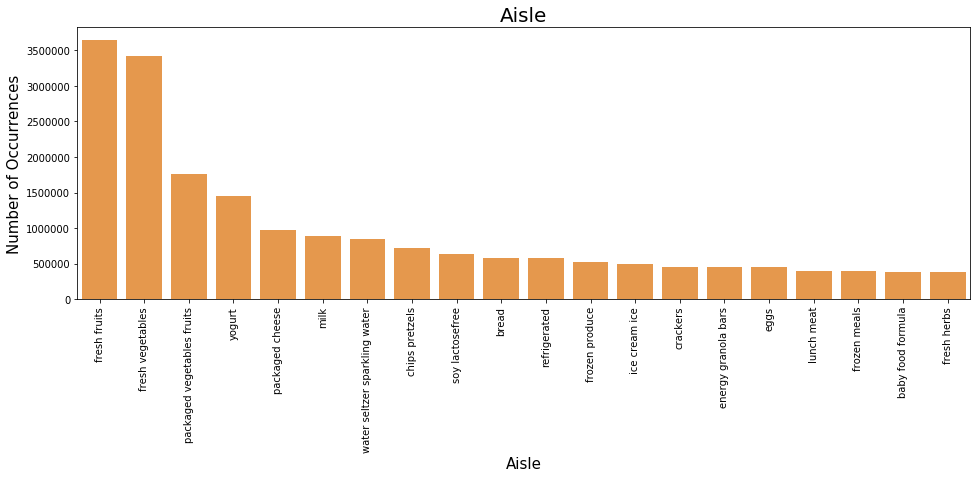

In [96]:
cnt_srs = order_products_prior['aisle'].value_counts().head(20)
plt.figure(figsize=(16,5))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[7])
plt.ylabel('Number of Occurrences', fontsize=15)
plt.xlabel('Aisle', fontsize=15)
plt.xticks(rotation='vertical')
plt.title("Aisle", fontsize=20)
plt.savefig("Aisle")
plt.show()

## Department Distribution

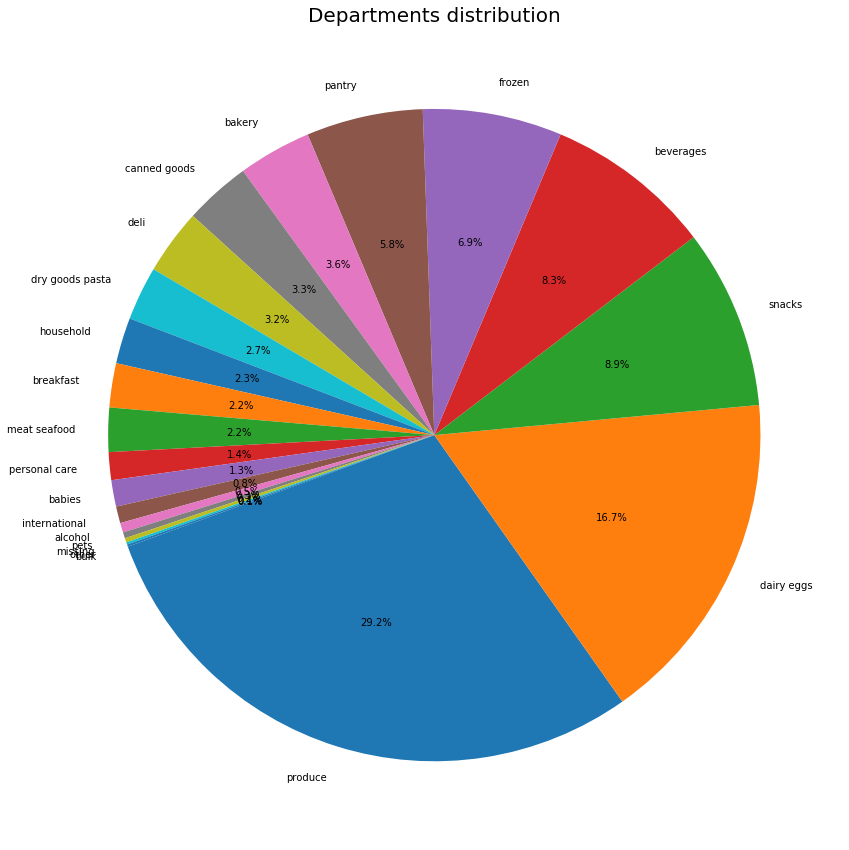

In [98]:
plt.figure(figsize=(15,15))
temp_series = order_products_prior['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=20)
plt.savefig("Departments distribution")
plt.show()

## Department Wise Reorder Ratio

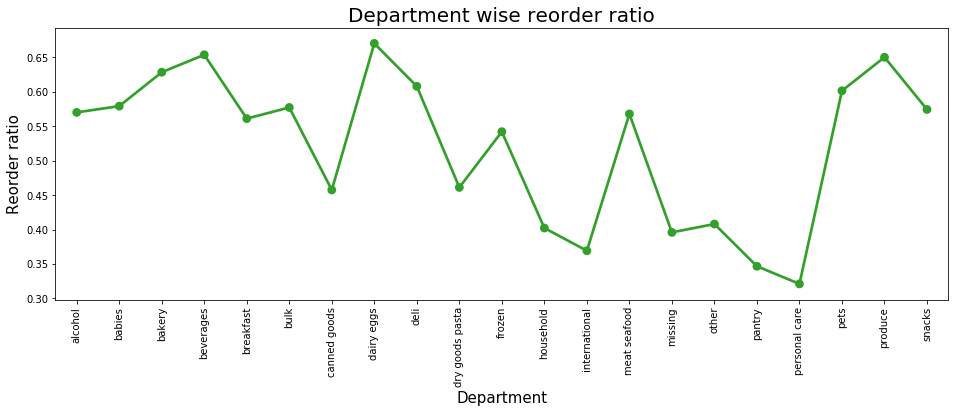

In [100]:
grouped_df = order_products_prior.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(16,5))
sns.pointplot(grouped_df['department'].values, grouped_df['reordered'].values, alpha=0.8, color=color[3])
plt.ylabel('Reorder ratio', fontsize=15)
plt.xlabel('Department', fontsize=15)
plt.title("Department wise reorder ratio", fontsize=20)
plt.xticks(rotation='vertical')
plt.savefig("Department wise reorder ratio")
plt.show()

## Add to card order - Reorder ratio

/Users/cindyw/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


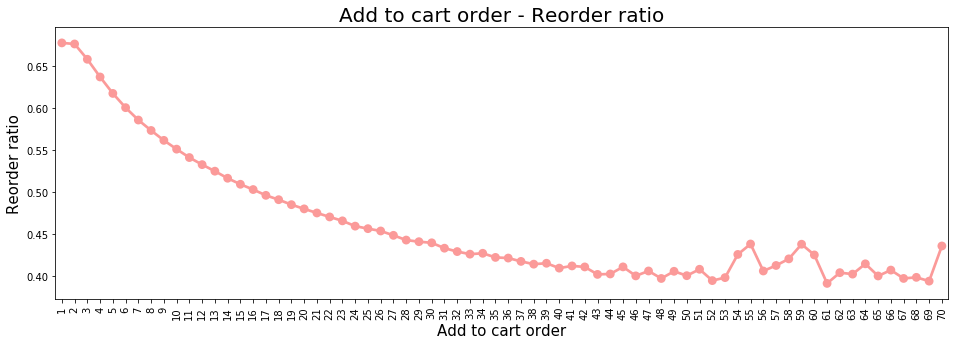

In [102]:
order_products_prior["add_to_cart_order_mod"] = order_products_prior["add_to_cart_order"].copy()
order_products_prior["add_to_cart_order_mod"].ix[order_products_prior["add_to_cart_order_mod"]>70] = 70
grouped_df = order_products_prior.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(16,5))
sns.pointplot(grouped_df['add_to_cart_order_mod'].values, grouped_df['reordered'].values, alpha=0.8, color=color[4])
plt.ylabel('Reorder ratio', fontsize=15)
plt.xlabel('Add to cart order', fontsize=15)
plt.title("Add to cart order - Reorder ratio", fontsize=20)
plt.xticks(rotation='vertical')
plt.savefig("Add to cart order - Reorder ratio")
plt.show()